Data Anlaysis

In [69]:
import pandas as pd

# Load dataset
df = pd.read_csv("NIFTY 50.csv")   # rename file if needed

# Clean column names
df.columns = df.columns.str.strip()

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convert numeric columns
num_cols = ['Open','High','Low','Close','Adj Close','Volume']
for col in num_cols:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.replace(",", "")
            .str.replace(" ", "")
        )
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Sort by Date
df = df.sort_values("Date").reset_index(drop=True)

print("Cleaning complete!")
df.head()


Cleaning complete!


C:\Users\Jitesh Jangam\AppData\Local\Temp\ipykernel_27912\872162033.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,2024-11-18,23605.30,23606.80,23350.40,23453.80,263311912,25257.33
1,2024-11-19,23529.55,23780.65,23464.80,23518.50,297477279,30486.78
2,2024-11-21,23488.45,23507.30,23263.15,23349.90,420332354,40900.89
3,2024-11-22,23411.80,23956.10,23359.00,23907.25,367562789,39257.52
4,2024-11-25,24253.55,24351.55,24135.45,24221.90,687172787,85975.81


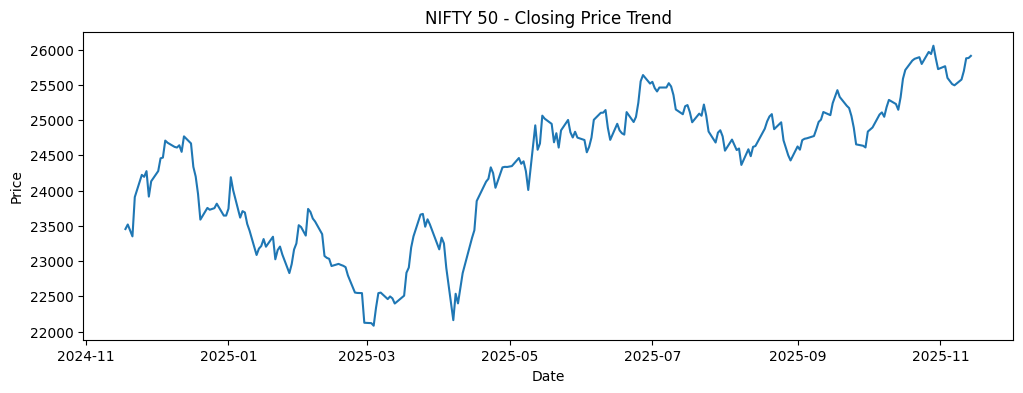

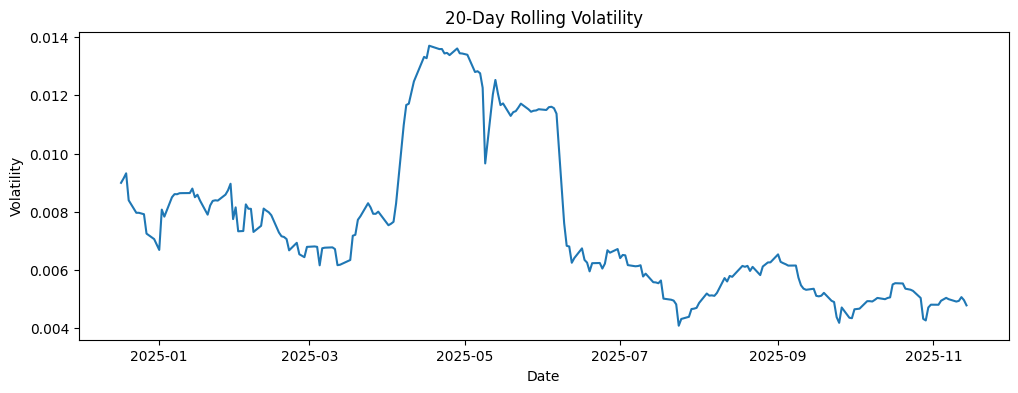

Start Date: 2024-11-18 00:00:00
End Date: 2025-11-14 00:00:00
Total Return (%): 10.47
Average Daily Return (%): 0.0435
Daily Volatility (%): 0.7838


In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df['Date'] = pd.to_datetime(df['Date'])
df['Close'] = pd.to_numeric(df['Close'].astype(str).str.replace(',', ''), errors='coerce')

# 1. Create analysis metrics
df['Daily_Return'] = df['Close'].pct_change()
df['Volatility20'] = df['Daily_Return'].rolling(20).std()

df['MA20'] = df['Close'].rolling(20, min_periods=1).mean()
df['MA50'] = df['Close'].rolling(50, min_periods=1).mean()
df['MA200'] = df['Close'].rolling(200, min_periods=1).mean()

# 2. Closing Price Chart
plt.figure(figsize=(12,4))
plt.plot(df['Date'], df['Close'])
plt.title("NIFTY 50 - Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

# 3. Volatility
plt.figure(figsize=(12,4))
plt.plot(df['Date'], df['Volatility20'])
plt.title("20-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()

# 4. Print Key Insights
print("Start Date:", df['Date'].min())
print("End Date:", df['Date'].max())
print("Total Return (%):", round((df['Close'].iloc[-1] / df['Close'].iloc[0] - 1) * 100, 2))
print("Average Daily Return (%):", round(df['Daily_Return'].mean() * 100, 4))
print("Daily Volatility (%):", round(df['Daily_Return'].std() * 100, 4))


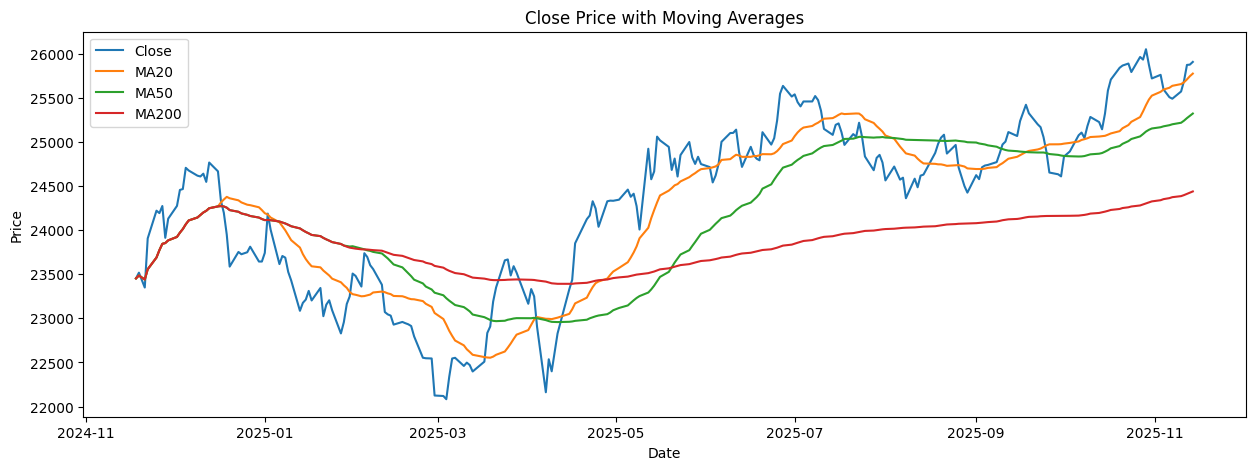

In [71]:
# Convert columns
df['Date'] = pd.to_datetime(df['Date'])
df['Close'] = pd.to_numeric(df['Close'].astype(str).str.replace(',', ''), errors='coerce')

# Calculate Moving Averages
df['MA20'] = df['Close'].rolling(20, min_periods=1).mean()
df['MA50'] = df['Close'].rolling(50, min_periods=1).mean()
df['MA200'] = df['Close'].rolling(200, min_periods=1).mean()

# Plot
plt.figure(figsize=(15,5))
plt.plot(df['Date'], df['Close'], label="Close")
plt.plot(df['Date'], df['MA20'], label="MA20")
plt.plot(df['Date'], df['MA50'], label="MA50")
plt.plot(df['Date'], df['MA200'], label="MA200")

plt.title("Close Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

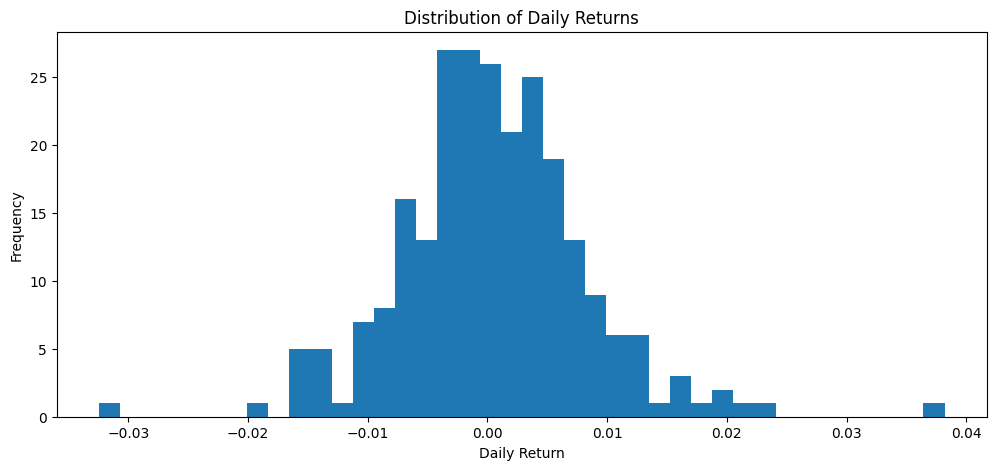

In [72]:
# Histogram of Daily Returns
plt.figure(figsize=(12,5))
plt.hist(df['Daily_Return'], bins=40)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

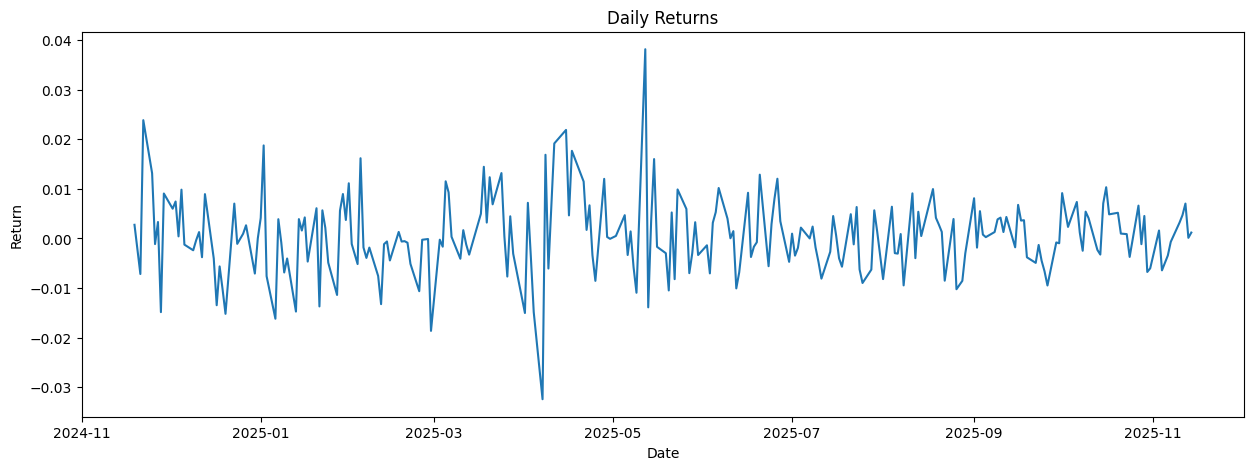

In [73]:
# Daily Returns Line Chart

plt.figure(figsize=(15,5))
plt.plot(df['Date'], df['Daily_Return'])
plt.title("Daily Returns")
plt.xlabel("Date")
plt.ylabel("Return")
plt.show()

In [ ]:
df['Daily_Return'] = df['Close'].pct_change() * 100

In [75]:
total_return = ((df['Close'].iloc[-1] / df['Close'].iloc[0]) - 1) * 100


In [76]:
total_days = df['Date'].nunique()


In [77]:
max_gain = df['Daily_Return'].max()


In [78]:
max_loss = df['Daily_Return'].min()


In [79]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_avg_return = df.groupby('Month')['Daily_Return'].mean()


In [80]:
df['Return_Bin'] = pd.cut(df['Daily_Return'], bins=20)


In [81]:
df.to_csv("NIFTY_50_Analysis.csv", index=False)

In [83]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),Daily_Return,Volatility20,MA20,MA50,MA200,Month,Return_Bin
0,2024-11-18,23605.30,23606.80,23350.40,23453.80,263311912,25257.33,NaN,NaN,NaN,NaN,23453.800000,2024-11,NaN
1,2024-11-19,23529.55,23780.65,23464.80,23518.50,297477279,30486.78,0.275861,NaN,NaN,NaN,23486.150000,2024-11,"(-0.0656, 0.288]"
2,2024-11-21,23488.45,23507.30,23263.15,23349.90,420332354,40900.89,-0.716882,NaN,NaN,NaN,23440.733333,2024-11,"(-0.772, -0.419]"
3,2024-11-22,23411.80,23956.10,23359.00,23907.25,367562789,39257.52,2.386948,NaN,NaN,NaN,23557.362500,2024-11,"(2.053, 2.406]"
4,2024-11-25,24253.55,24351.55,24135.45,24221.90,687172787,85975.81,1.316128,NaN,NaN,NaN,23690.270000,2024-11,"(0.994, 1.347]"
